## Multilayer Perceptron (Deep Neural Network)

Task: Build a multilayer perceptron from scratch and implement for the Fashion MNIST classification problem. 
- The Fashion MNIST is multi class problem. The dataset contains 10 classes.
- The neural network should be able to predict the fashion category of the product when given an image.
 
**Label:Description**

    0:T-shirt/top
    1:Trouser
    2:Pullover
    3:Dress
    4:Coat
    5:Sandal
    6:Shirt
    7:Sneaker
    8:Bag
    9:Ankle boot

In [1]:
# Import packages 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#### Import Dataset
We'll use `tensorflow.keras.datasets` to import the `fashion_mnist` dataset.

In [4]:
# Use the keras module to import the necessary data 
from tensorflow.keras.datasets import fashion_mnist
# load data as test/train and image/label sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#### Data Stats
- The images are 28x28
- Training set has 60000 images
- Test set has 10000 images
- There are 10 classes namely: 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'

In [7]:
#print some data stats
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)
print('Number of classes:', len(np.unique(y_train)))

Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)
Number of classes: 10


#### Data Visualization
The figures show some of the images from the training dataset and their respective labels. 
- The images are grayscale, each pixel value has a range from 0 to 255. The images are normalized by dividing by 255.

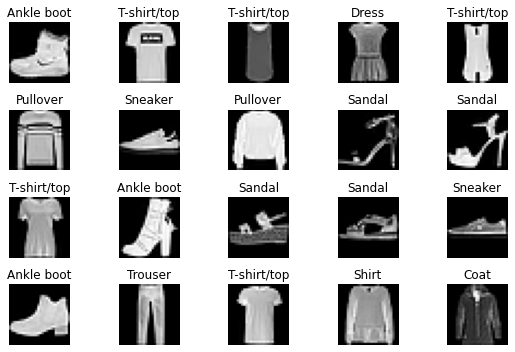

In [6]:
# Define class names as given in Fashion MNIST data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Rescale pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Plot some examples from the dataset
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(8, 5))
axes = axes.flatten()
for i in range(len(axes)):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title(class_names[y_train[i]])
    axes[i].axis('off')
plt.tight_layout()
plt.show()

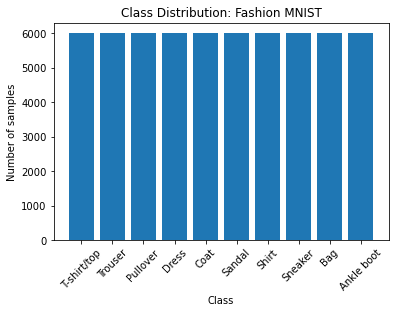

In [9]:
# Count the number of samples in each class
class_counts = np.bincount(y_train)
# Plot a bar chart of the class distribution
plt.bar(range(len(class_names)), class_counts)
plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Class Distribution: Fashion MNIST')
plt.show()

**Class distribution**: The bar chart of the class distribution shows that the classes are evenly represented in the dataset. 

#### Data Preprocessing
**Image Flattening**: In a Multilayer Perceptron (MLP) neural network, the input layer consists of a set of neurons that receive the input data. For image classification tasks, such as the Fashion MNIST dataset, the input data consists of images that are typically represented as 2D arrays of pixel values. However, MLPs require their input to be in the form of a 1D array or a vector.

- The reason for flattening the images is that each pixel value in the image represents a separate input feature to the MLP. Flattening the images into a 1D array ensures that each input neuron in the input layer receives the pixel value for a specific feature. This allows the MLP to learn the relationships between the individual pixel values and the output class labels. The following figure provides an example of flattening 2D image into 1D column vector:

<img src="https://github.com/kashifliaqat/Data_Science_and_Machine-Learning/raw/main/Images/flatten.png" alt="Image Flattening">

Image Source: [Towards Data Science](https://towardsdatascience.com/the-most-intuitive-and-easiest-guide-for-convolutional-neural-network-3607be47480)

**One-Hot Encoding**: The Fashion MNIST dataset is labeled with a single class label from 10 possible categories, ranging from 0 to 9. However, these class labels cannot be used directly as input to a machine learning model, as they are categorical variables. One hot encoding is a way to transform these labels into a numerical format that can be used as input to the model. In one hot encoding, each class label is represented as a binary vector with length equal to the number of classes. Each element in the vector corresponds to a single class, and is set to 1 if the image belongs to that class, and 0 otherwise. The following figure provides an example of One-Hot Encoding:

<img src="https://github.com/kashifliaqat/Data_Science_and_Machine-Learning/raw/main/Images/one_hot.png" alt="One-Hot Encoding">

Image Source: [International Journal of Environmental Research and Public Health](https://www.researchgate.net/publication/344409939_Predictive_Modeling_for_Occupational_Safety_Outcomes_and_Days_Away_from_Work_Analysis_in_Mining_Operations)



In [20]:
# Flatten the training images (1D coloumn vectors). 
flat_train_X = []
# One hot encode the training labels
onehot_train_y = []

for x, y in zip(train_X, train_y):
    flat_train_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y][0] = 1.0
    onehot_train_y.append(temp_vec)
   

# Flatten the testing images (1D coloumn vectors). 
flat_test_X = []
onehot_test_y = []

for x, y in zip(test_X, test_y):
    flat_test_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y] = 1.0
    onehot_test_y.append(temp_vec)

In [21]:
class DenseNetwork(object):
    def __init__(self, layers = [784, 60, 60, 10]):
        self.layers = layers
        self.W, self.B = self.initialize_weights()

    def initialize_weights(self):
        # The following Python lists will contain numpy matrices
        # connected the layers in the neural network 
        W = [[0.0]]
        B = [[0.0]]
        for i in range(1, len(self.layers)):
            # The scalling factor is something I found in a research paper :)
            w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
            b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])
        
            W.append(w_temp)
            B.append(b_temp)
        return W, B

    def sigmoid(self, z):
        return 1.0/(1.0+np.exp(-z))

    def d_sigmoid(self, z):
        return self.sigmoid(z)*(1.0 - self.sigmoid(z))
    
    def mse(self, a, y):
        return .5*sum((a[i] - y[i])**2 for i in range(10))[0]

    def MSE(self, W, B, X, y):
        cost = 0.0
        m = 0
        for xi, yi in zip(X, y):
            a = self.forward_pass(W, B, xi, predict_vector = True)
            cost += self.mse(a, yi)
            m+=1
        return cost/m
    
    def forward_pass(self, W, B, xi, predict_vector = False):
        Z = [[0.0]]
        A = [xi]
        L = len(W) - 1
        for i in range(1, L + 1):
            z = W[i] @ A[i-1] + B[i]
            Z.append(z)
            
            a = self.sigmoid(z)
            A.append(a)
            
        if predict_vector == False:
            return Z, A
        else:
            return A[-1]
        
    def train(self, X_train, y_train, alpha = 0.1, epochs = 10):
        # Print the initial mean squared error
        self.errors_ = [self.MSE(self.W, self.B, X_train, y_train)]
        print(f"Starting Cost = {self.errors_[0]}")

        # Find your sample size
        sample_size = len(X_train)

        # Find the number of non-input layers.
        L = len(self.layers) - 1

        # For each epoch perform stochastic gradient descent. 
        for k in range(epochs):
            # Loop over each (xi, yi) training pair of data.
            for xi, yi in zip(X_train, y_train):
                # Use the forward pass function defined before
                # and find the preactivation and postactivation values.
                Z, A = self.forward_pass(self.W, self.B, xi)

                # Store the errors in a dictionary for clear interpretation
                # of computation of these values.
                deltas = dict()

                # Compute the output error 
                output_error = (A[L] - yi)*self.d_sigmoid(Z[L])
                deltas[L] = output_error

                # Loop from L-1 to 1. Recall the right entry of the range function 
                # is non-inclusive. 
                for i in range(L-1, 0, -1):
                    # Compute the node errors at each hidden layer
                    deltas[i] = (self.W[i+1].T @ deltas[i+1])*self.d_sigmoid(Z[i])

                # Loop over each hidden layer and the output layer to perform gradient 
                # descent. 
                for i in range(1, L+1):
                    self.W[i] -= alpha*deltas[i] @ A[i-1].T
                    self.B[i] -= alpha*deltas[i]

            # Show the user the cost over all training examples
            self.errors_.append(self.MSE(self.W, self.B, X_train, y_train))   
            print(f"{k + 1}-Epoch Cost = {self.errors_[-1]}")
    

    def predict(self, xi):
        depth = len(self.layers)
        _, A = self.forward_pass(self.W, self.B, xi)
        return np.argmax(A[-1])

MSE(net.W, net.B, flat_train_X, onehot_train_y) = 1.184235010541276 

predicted digit is: 5
actual digit is: 4


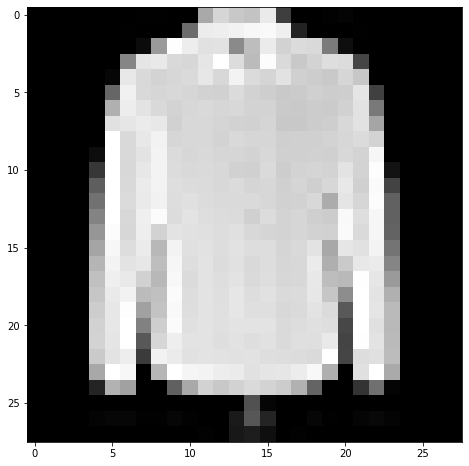

In [22]:
# Initialize a network with 784 input nodes, two hidden layers with 60 nodes each 
# and a output layer with 10 nodes. 
net = DenseNetwork(layers = [784, 120, 145, 120, 10])

# Check the mean squared error before training 
print(f"MSE(net.W, net.B, flat_train_X, onehot_train_y) = {net.MSE(net.W, net.B, flat_train_X, onehot_train_y)} \n")

# Make a random prediction before training
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

In [23]:
# Train your network with stochastic gradient descent!
net.train(flat_train_X, onehot_train_y)

Starting Cost = 1.184235010541276
1-Epoch Cost = 0.11948019675925106
2-Epoch Cost = 0.10734796228039652
3-Epoch Cost = 0.09778582739763952
4-Epoch Cost = 0.0954458447942968
5-Epoch Cost = 0.09270781102734542
6-Epoch Cost = 0.08980623798156978
7-Epoch Cost = 0.08910181773838728
8-Epoch Cost = 0.08684688831878395
9-Epoch Cost = 0.08695429050388646
10-Epoch Cost = 0.08564450873769681


predicted digit is: 2
actual digit is: 2


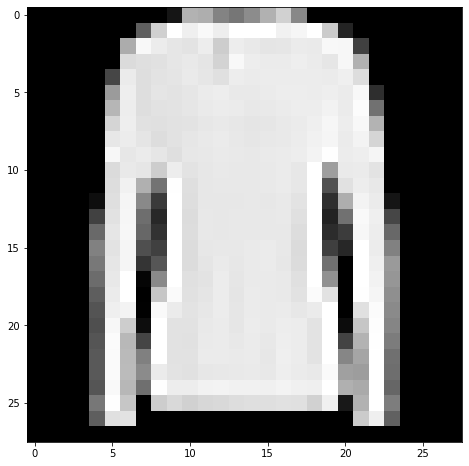

predicted digit is: 7
actual digit is: 7


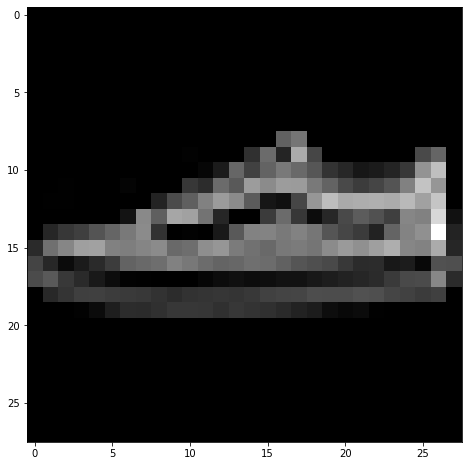

predicted digit is: 4
actual digit is: 4


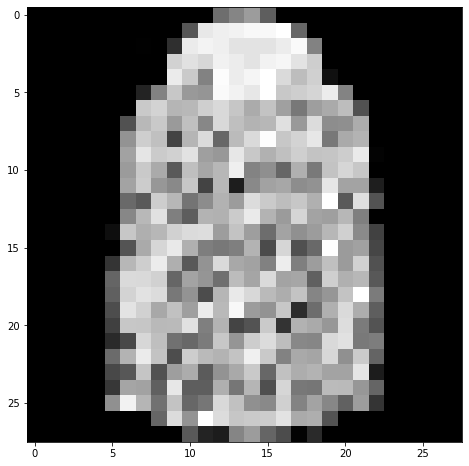

predicted digit is: 7
actual digit is: 9


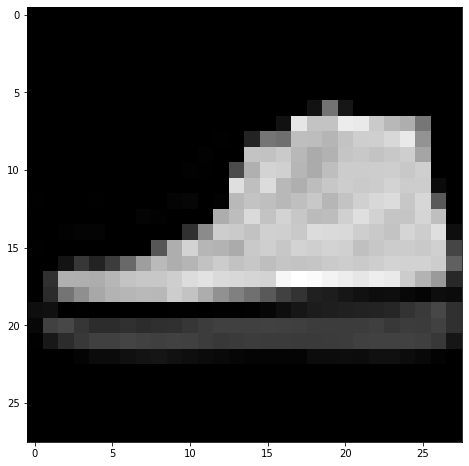

predicted digit is: 9
actual digit is: 9


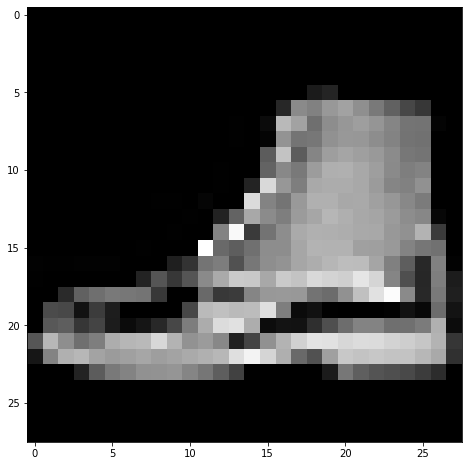

predicted digit is: 8
actual digit is: 8


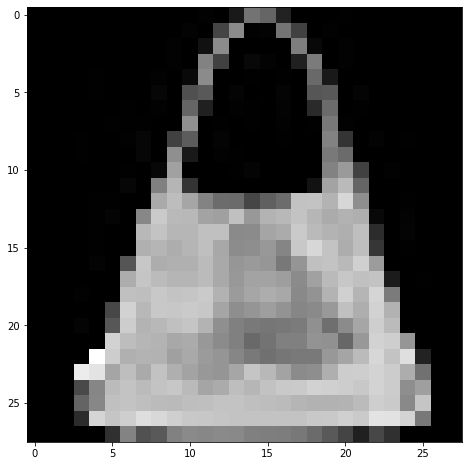

predicted digit is: 8
actual digit is: 8


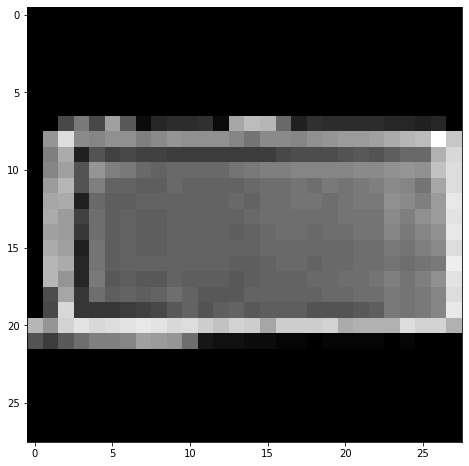

predicted digit is: 2
actual digit is: 2


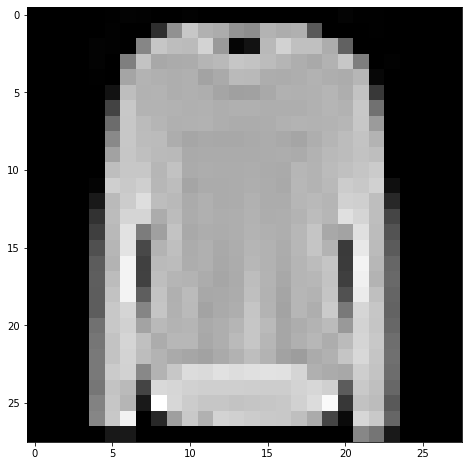

predicted digit is: 8
actual digit is: 8


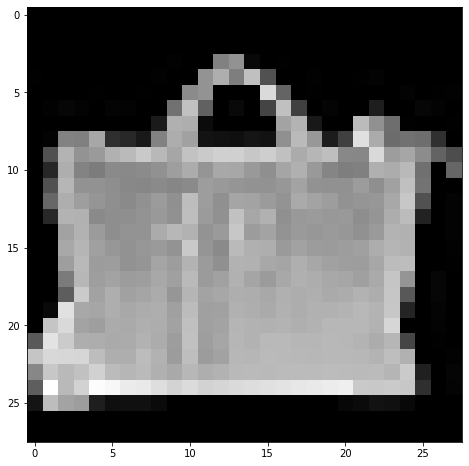

predicted digit is: 5
actual digit is: 5


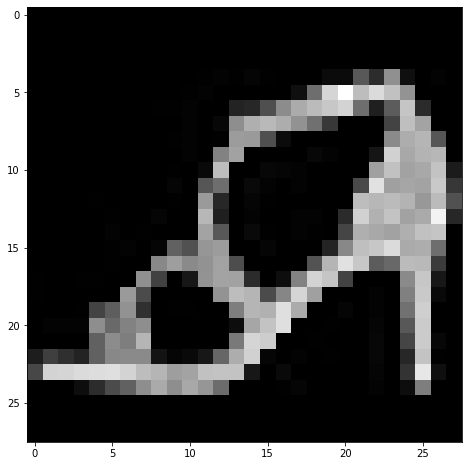

In [27]:
for a in range(10):
    i = np.random.randint(0, len(flat_test_X))
    prediction = net.predict(flat_test_X[i])
    print(f"predicted digit is: {prediction}")
    print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
    plt.figure(figsize=(8, 8))
    plt.imshow(test_X[i], cmap="gray")
    plt.show()

In [25]:
# Compute the classification accuracy of our trained model on the test data (I bet we did well!)
sum([int(net.predict(x) == y) for x, y in zip(flat_test_X, test_y)])/len(onehot_test_y)

0.8569